### Creadit Risk Managment

This project aims to analyze and predict loan default risk using machine learning techniques. By leveraging key financial and personal attributes, we build predictive models to assist in credit decision-making.

### Importing important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




In [2]:
df=pd.read_csv("/content/credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


from matplotlib import pyplot as plt
_df_0['person_age'].plot(kind='hist', bins=20, title='person_age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['person_income'].plot(kind='hist', bins=20, title='person_income')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['person_emp_length'].plot(kind='hist', bins=20, title='person_emp_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['loan_amnt'].plot(kind='hist', bins=20, title='loan_amnt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='person_age', y='person_income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='person_income', y='person_emp_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='person_emp_length', y='loan_amnt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='loan_amnt', y='loan_int_rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['person_age'].plot(kind='line', figsize=(8, 4), title='person_age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['person_income'].plot(kind='line', figsize=(8, 4), title='person_income')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['person_emp_length'].plot(kind='line', figsize=(8, 4), title='person_emp_length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['loan_amnt'].plot(kind='line', figsize=(8, 4), title='loan_amnt')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# check missing value
df.isnull().sum()


,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [ ]:
# duplicate
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.dropna(inplace=True)

### Checking loan status relation with home ownership  

<Axes: xlabel='person_home_ownership', ylabel='count'>

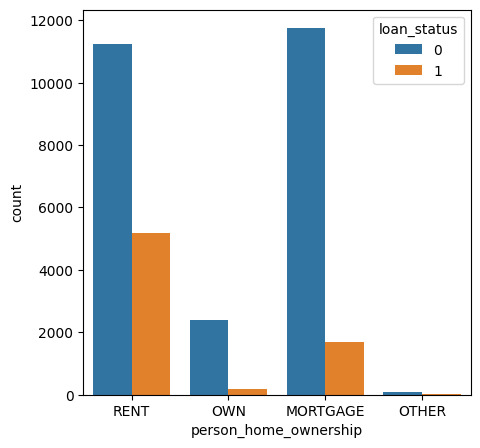

In [ ]:

plt.figure(figsize=(5,5))
sns.countplot(x="person_home_ownership", hue="loan_status", data=df)

In [ ]:
  df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.person_home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [ ]:
df.loan_intent.unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'PERSONAL'),
  Text(1, 0, 'EDUCATION'),
  Text(2, 0, 'MEDICAL'),
  Text(3, 0, 'VENTURE'),
  Text(4, 0, 'HOMEIMPROVEMENT'),
  Text(5, 0, 'DEBTCONSOLIDATION')])

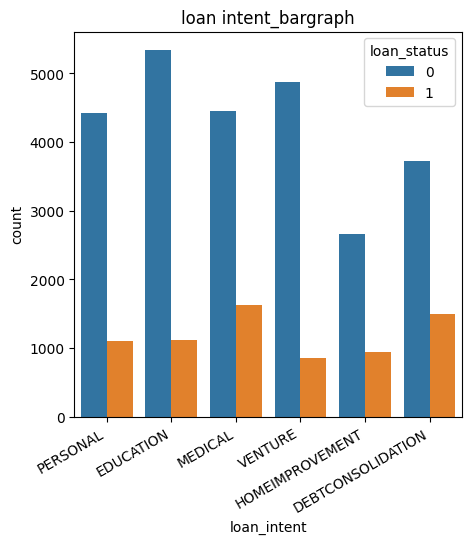

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x="loan_intent", hue="loan_status", data=df)
plt.title("loan intent_bargraph")
plt.xticks(rotation=30, ha="right")

## Analyzing relationship between "loan_intent", "loan_status" and "loan Amount"

In [ ]:
loan_intent_default_count = df[df['loan_status'] == 1].groupby("loan_intent")["loan_status"].count().reset_index(name='loan_intent_default_count')
print(loan_intent_default_count)

loan_intent_average_loan_amount = df.groupby("loan_intent")["loan_amnt"].mean().reset_index(name='loan_intent_average_loan_amount')
print(loan_intent_average_loan_amount)
merged_summary = pd.merge(loan_intent_default_count, loan_intent_average_loan_amount, on='loan_intent')
print(merged_summary)

         loan_intent  loan_intent_default_count
0  DEBTCONSOLIDATION                       1490
1          EDUCATION                       1111
2    HOMEIMPROVEMENT                        941
3            MEDICAL                       1621
4           PERSONAL                       1098
5            VENTURE                        847
         loan_intent  loan_intent_average_loan_amount
0  DEBTCONSOLIDATION                      9594.886800
1          EDUCATION                      9482.678599
2    HOMEIMPROVEMENT                     10360.520111
3            MEDICAL                      9259.582441
4           PERSONAL                      9573.772867
5            VENTURE                      9583.777758
         loan_intent  loan_intent_default_count  \
0  DEBTCONSOLIDATION                       1490   
1          EDUCATION                       1111   
2    HOMEIMPROVEMENT                        941   
3            MEDICAL                       1621   
4           PERSONAL           

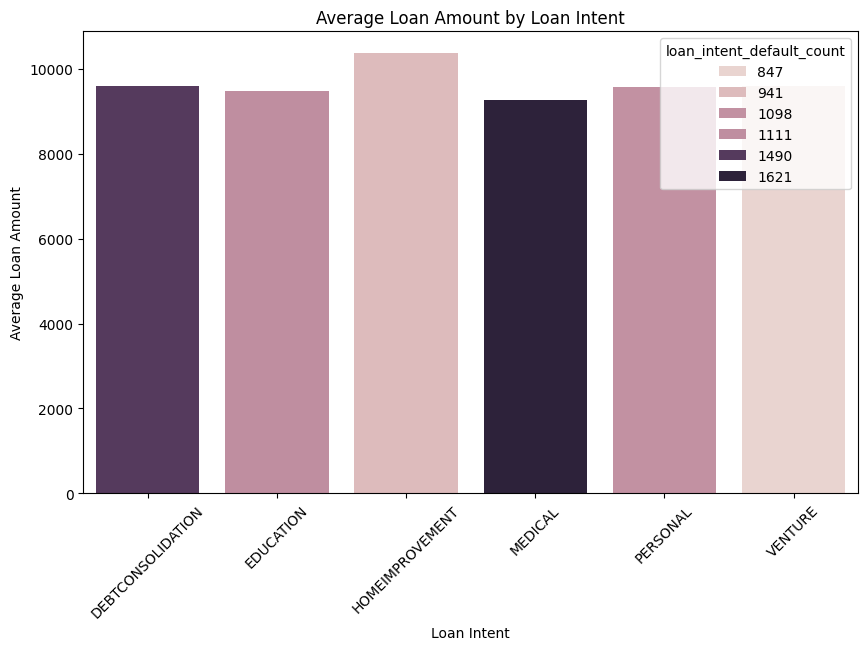

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='loan_intent', y='loan_intent_average_loan_amount', data=merged_summary, hue='loan_intent_default_count')
plt.title('Average Loan Amount by Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.groupby("loan_intent")["loan_amnt"].sum()

,loan_amnt
loan_intent,
DEBTCONSOLIDATION,50008550
EDUCATION,61191725
HOMEIMPROVEMENT,37349675
MEDICAL,56214925
PERSONAL,52856800
VENTURE,54809625


<Axes: xlabel='person_home_ownership', ylabel='person_income'>

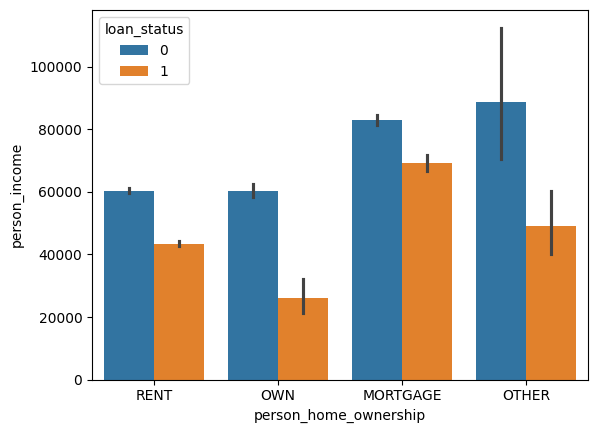

In [ ]:
sns.barplot(x="person_home_ownership", y="person_income", hue="loan_status", data=df)

In [ ]:
df["person_age"].unique()

array([ 22,  21,  25,  23,  24,  26, 144, 123,  20,  32,  34,  29,  33,
        28,  35,  31,  27,  30,  36,  40,  50,  45,  37,  39,  44,  43,
        41,  46,  38,  47,  42,  48,  49,  58,  65,  51,  53,  66,  61,
        54,  57,  59,  62,  60,  55,  52,  64,  70,  78,  69,  56,  73,
        63,  94,  80,  84,  76,  67])

In [ ]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
correlation_matrix = df[["loan_percent_income", "loan_status"]].corr()
print(correlation_matrix)

                     loan_percent_income  loan_status
loan_percent_income             1.000000     0.379366
loan_status                     0.379366     1.000000


### Correlation between default and debt income ratio shows that there is positive correaltion betweern them.

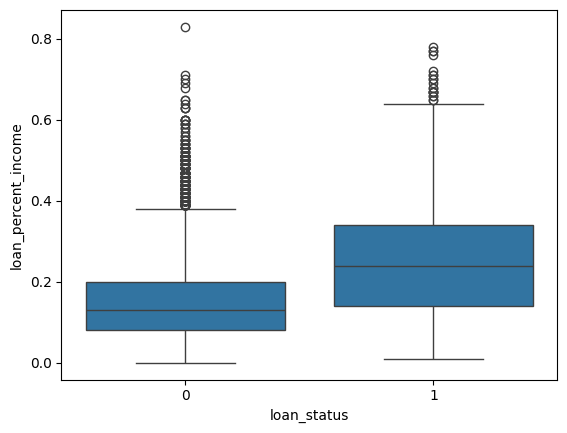

In [ ]:
# sacterplot

sns.boxplot(y="loan_percent_income", x="loan_status", data=df)




### Model prediction by Logistic Regression

In [3]:
X= df[['person_age'   ,'person_income'   ,'person_home_ownership',        'person_emp_length',           'loan_intent',    'loan_amnt',           'loan_int_rate','cb_person_default_on_file']]
y=df['loan_status']
X.drop(columns=['loan_amnt'],inplace=True)
numerical_feat=['person_age','person_income','person_emp_length','loan_int_rate']
categorical_feat=['person_home_ownership','loan_intent','cb_person_default_on_file']
numeric_transformer= Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
 ('scaler',StandardScaler())])

categorical_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent',fill_value='missing')),('onehot',OneHotEncoder(handle_unknown='ignore'))])

preprocessor=ColumnTransformer(transformers=[('num',numeric_transformer,numerical_feat),('cat',categorical_transformer,categorical_feat)])

X_processed=preprocessor.fit_transform(X)

categorical_columns=preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_feat)
numerical_columns=numerical_feat
all_columns=list(categorical_columns)+list(numerical_columns)






<ipython-input-3-9d107bbfff91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['loan_amnt'],inplace=True)


In [4]:
#splitting data training ans testing
X_train,X_test,y_train,y_test=train_test_split(X_processed,y,test_size=0.2,random_state=42)#

model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("accuracy_score"  ,accuracy_score(y_test,y_pred))
print("classification_report",classification_report(y_test,y_pred))
print("confusion_matrix",confusion_matrix(y_test,y_pred))

accuracy_score 0.8198557618536136
classification_report               precision    recall  f1-score   support

           0       0.84      0.96      0.89      5072
           1       0.69      0.34      0.46      1445

    accuracy                           0.82      6517
   macro avg       0.76      0.65      0.67      6517
weighted avg       0.80      0.82      0.80      6517

confusion_matrix [[4852  220]
 [ 954  491]]


### Save the Model

In [6]:
#save the model
import joblib
joblib.dump(model,"loan_default_model.pkl")

['loan_default_model.pkl']

###  Loan Default Risk Checker

In [11]:
from joblib import load
model= load("loan_default_model.pkl")

user_data = {
    'person_age': [int(input("Age: "))],
    'person_income': [int(input("Income: "))],
    'person_home_ownership': [input("Home Ownership (RENT/OWN/MORTGAGE/OTHER): ").upper()],
    'person_emp_length': [float(input("Employment Length (years): "))],
    'loan_amnt': [int(input("Loan Amount: "))],
    'loan_int_rate': [float(input("Interest Rate (%): "))],
    'cb_person_default_on_file': [input("Credit Bureau Default (Y/N): ").upper()],
    'loan_intent': [input("Loan Intent (PERSONAL/EDUCATION/MEDICAL/VENTURE/DEBTCONSOLIDATION/HOMEIMPROVEMENT/RELATIONALAFFAIRS): ").upper()]
}


user_df = pd.DataFrame(user_data)

input_processed = preprocessor.transform(user_df)
prediction = model.predict(input_processed)[0]

print(f"\n### Loan Default Prediction: {'DEFAULT' if prediction == 1 else 'NO DEFAULT'}")



Age: 23
Income: 345
Home Ownership (RENT/OWN/MORTGAGE/OTHER): OTHER
Employment Length (years): 34
Loan Amount: 345
Interest Rate (%): 23
Credit Bureau Default (Y/N): Y
Loan Intent (PERSONAL/EDUCATION/MEDICAL/VENTURE/DEBTCONSOLIDATION/HOMEIMPROVEMENT/RELATIONALAFFAIRS): VENTURE

### Loan Default Prediction: DEFAULT


### Model prdiction by RandomForest

In [10]:
#random forest
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [11]:
#
print("accuracy_score"  ,accuracy_score(y_test,y_pred))
print("classification_report",classification_report(y_test,y_pred))
print("confusion_matrix",confusion_matrix(y_test,y_pred))

accuracy_score 0.852692956882001
classification_report               precision    recall  f1-score   support

           0       0.87      0.95      0.91      5072
           1       0.75      0.51      0.61      1445

    accuracy                           0.85      6517
   macro avg       0.81      0.73      0.76      6517
weighted avg       0.84      0.85      0.84      6517

confusion_matrix [[4820  252]
 [ 708  737]]


### Model prediction by KNN Classifier

In [12]:
# KNN classifier
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [13]:
print("accuracy_score"  ,accuracy_score(y_test,y_pred))
print("classification_report",classification_report(y_test,y_pred))
print("confusion_matrix",confusion_matrix(y_test,y_pred))

accuracy_score 0.8190885376707073
classification_report               precision    recall  f1-score   support

           0       0.85      0.93      0.89      5072
           1       0.64      0.42      0.50      1445

    accuracy                           0.82      6517
   macro avg       0.75      0.67      0.70      6517
weighted avg       0.80      0.82      0.80      6517

confusion_matrix [[4737  335]
 [ 844  601]]


### Conclusion
This Loan Default Risk Checker allows for real-time predictions based on various loan applicant details, providing valuable insights into the likelihood of default. The script leverages a pre-trained machine learning model and user input to generate a simple "DEFAULT" or "NO DEFAULT" result. he accuracy of the Loan Default Risk Checker can be improved by incorporating additional features like credit scores, fine-tuning hyperparameters, and using advanced models such as XGBoost. Cross-validation can enhance generalization, while handling class imbalance with techniques like SMOTE or class weighting can improve prediction reliability.